<a href="https://colab.research.google.com/github/KTGamage/Flower_Recognition_CNN_Model/blob/main/Flower_Recognition_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
#Import Libraries

import os
import numpy as np

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten


In [ ]:
#Feth Images count from folders

In [ ]:
count = 0
dirs = os.listdir('/content/drive/MyDrive/Flower Recognition CNN project/images/')
for dir in dirs:
  files = list(os.listdir('/content/drive/MyDrive/Flower Recognition CNN project/images/' + dir))
  print(dir + ' Folder has '+ str(len(files)) + ' Images')
  count = count + len(files)

print('\nImages folder has ' + str(count) + ' Images')

daisy Folder has 764 Images
dandelion Folder has 1052 Images
rose Folder has 784 Images
tulip Folder has 987 Images
sunflower Folder has 733 Images

Images folder has 4320 Images


In [ ]:
#Load Images into Arrays as Dataset

In [ ]:
base_dir = ('/content/drive/MyDrive/Flower Recognition CNN project/images/')
img_size = 180
batch = 32

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(base_dir,
                                                       seed = 123,
                                                       validation_split = 0.2,
                                                       subset = 'training',
                                                       batch_size = batch,
                                                       image_size= (img_size,img_size)
                                                       )

val_ds = tf.keras.utils.image_dataset_from_directory(base_dir,
                                                       seed = 123,
                                                       validation_split = 0.2,
                                                       subset = 'validation',
                                                       batch_size = batch,
                                                       image_size= (img_size,img_size)
                                                       )

Found 4320 files belonging to 5 classes.
Using 3456 files for training.
Found 4320 files belonging to 5 classes.
Using 864 files for validation.


In [ ]:
flower_names = train_ds.class_names
flower_names

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

In [ ]:
import matplotlib.pyplot as plt

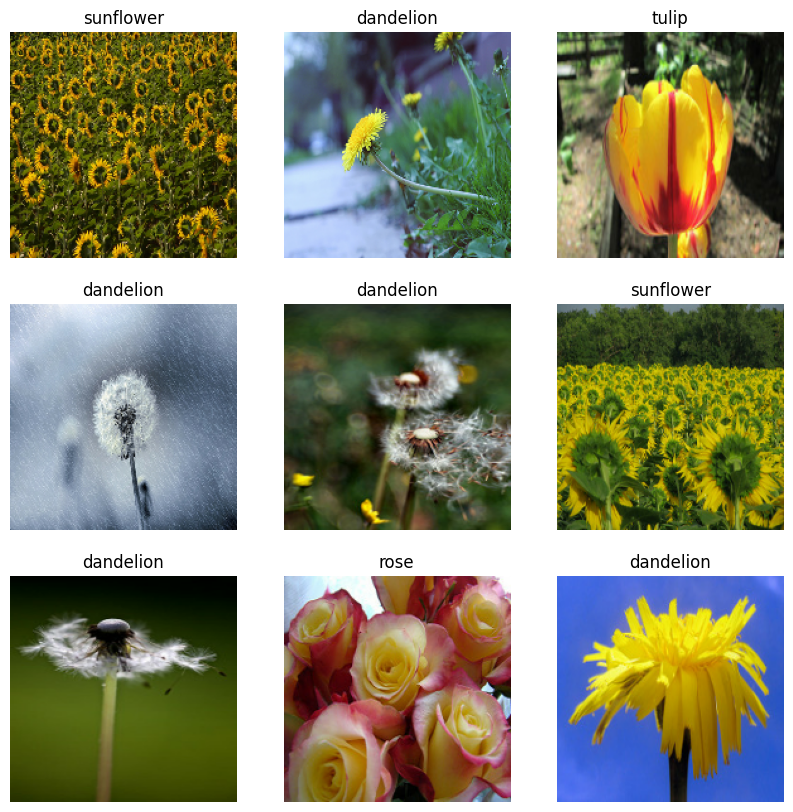

In [ ]:
i = 0
plt.figure(figsize = (10, 10))

for images, labels in train_ds.take(1):
 for i in range(9):
  plt.subplot(3,3, i+1)
  plt.imshow(images[i].numpy().astype('uint8'))
  plt.title(flower_names[labels[i]])
  plt.axis('off')

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

In [ ]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)

In [ ]:
val_ds = val_ds.cache().prefetch(buffer_size = AUTOTUNE)

In [ ]:
#Data Augmentation

In [52]:
data_augmentation = Sequential([
    layers.Input(shape=(img_size, img_size, 3)),
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

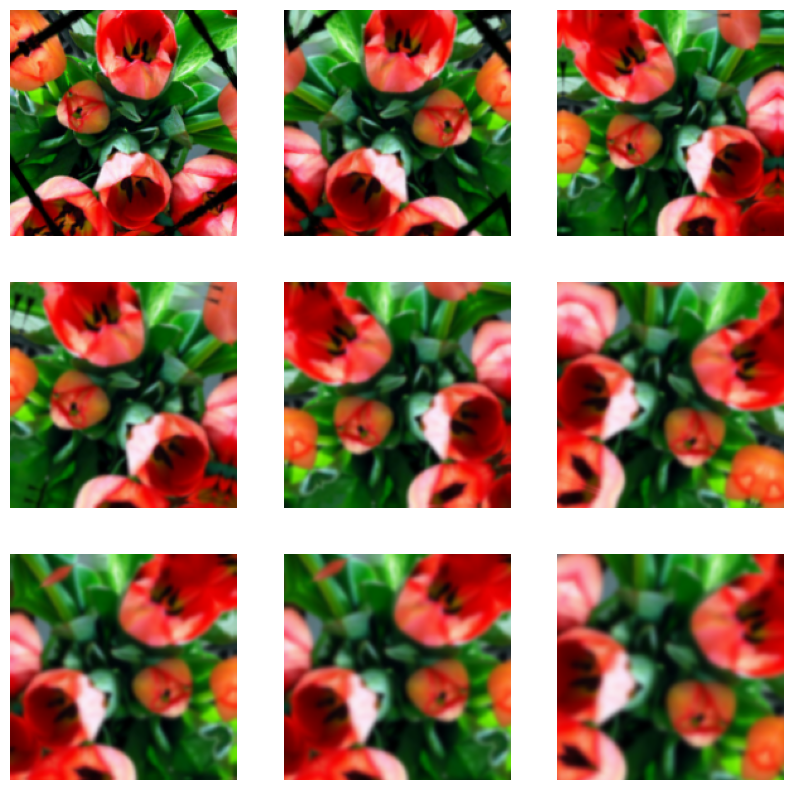

In [53]:
i = 0
plt.figure(figsize = (10, 10))

for images, labels in train_ds.take(1):
 for i in range(9):
  images= data_augmentation(images)
  plt.subplot(3,3, i+1)
  plt.imshow(images[0].numpy().astype('uint8'))
  plt.axis('off')

In [54]:
#Model Creation

In [55]:
model = Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    Conv2D(16, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(5)

])

In [56]:
model.compile(optimizer = 'adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy']
              )

In [57]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_3 (Sequential)            │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_1 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 180, 180, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 90, 90, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 90, 90, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 45, 45, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 45, 45, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 30976)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       3,965,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,989,285 (15.22 MB)

 Trainable params: 3,989,285 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

In [58]:
history = model.fit(train_ds, epochs=15, validation_data=val_ds)

Epoch 1/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 85s 768ms/step - accuracy: 0.2970 - loss: 1.7340 - val_accuracy: 0.4826 - val_loss: 1.1616
Epoch 2/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 141s 758ms/step - accuracy: 0.5057 - loss: 1.1659 - val_accuracy: 0.5880 - val_loss: 1.0640
Epoch 3/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 82s 756ms/step - accuracy: 0.5782 - loss: 1.0463 - val_accuracy: 0.6204 - val_loss: 0.9647
Epoch 4/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 82s 762ms/step - accuracy: 0.6207 - loss: 0.9506 - val_accuracy: 0.6262 - val_loss: 0.9811
Epoch 5/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 82s 760ms/step - accuracy: 0.6489 - loss: 0.8938 - val_accuracy: 0.6574 - val_loss: 0.9024
Epoch 6/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 81s 753ms/step - accuracy: 0.6592 - loss: 0.8689 - val_accuracy: 0.6655 - val_loss: 0.8849
Epoch 7/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 82s 760ms/step - accuracy: 0.6885 - loss: 0.8388 - val_accuracy: 0.6759 - val_loss: 0.8556
Epoch 8/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 81s 754ms/step - accuracy: 0.6956 - loss: 

In [59]:
def classify_images(image_path):

  input_image = tf.keras.utils.load_img(image_path, target_size=(180,180))
  input_image_array = tf.keras.utils.img_to_array(input_image)
  input_image_exp_dim = tf.expand_dims(input_image_array,0)

  predictions = model.predict(input_image_exp_dim)
  result = tf.nn.softmax(predictions[0])
  outcome = 'The Image belongs to ' + flower_names[np.argmax(result)] + ' with a score of ' + str(np.max(result)*100)
  return outcome

In [60]:
classify_images('/content/drive/MyDrive/Flower Recognition CNN project/sample/rose.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


'The Image belongs to rose with a score of 53.880250453948975'

In [63]:
from tensorflow.keras.models import load_model
model.save('/content/drive/MyDrive/saved model/Flower_Recog_Model.keras')